See [github repo](https://github.com/TimotheeMathieu/IllustrationRobustML) for ipynb files 

In this notebook, we illustrate the robust properties of [RobustWeighdedRegressor](https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.robust.RobustWeightedRegressor.html#sklearn_extra.robust.RobustWeightedRegressor) on a simple toy example.

We compare our agorithm with several linear estimators from scikit-learn [linear-model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module. 

Notice that the "robust" estimator `HuberRegressor` is only robust to outliers in $y$ while `RobustWeighdedRegressor`, `TheilSenRegressor` and `RANSACRegressor` are robust to outliers in both $X$ and $y$.

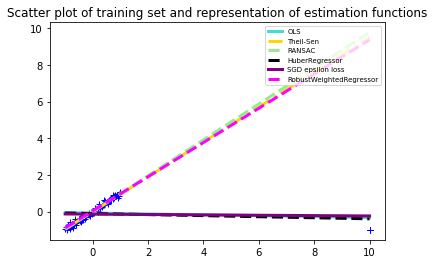

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn_extra.robust import RobustWeightedRegressor
from sklearn.utils import shuffle
from sklearn.linear_model import (
    SGDRegressor,
    LinearRegression,
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
)

# Sample along a line with a Gaussian noise.
rng = np.random.RandomState(42)
X = rng.uniform(-1, 1, size=[100])
y = X + 0.1 * rng.normal(size=100)

# Change the 5 last entries to an outlier.
X[-5:] = 10
X = X.reshape(-1, 1)
y[-5:] = -1

# Shuffle the data so that we don't know where the outlier is.
X, y = shuffle(X, y, random_state=rng)
estimators = [
    ("OLS", LinearRegression()),
    ("Theil-Sen", TheilSenRegressor(random_state=rng)),
    ("RANSAC", RANSACRegressor(random_state=rng)),
    ("HuberRegressor", HuberRegressor()),
    (
        "SGD epsilon loss",
        SGDRegressor(loss="epsilon_insensitive", random_state=rng),
    ),
    (
        "RobustWeightedRegressor",
        RobustWeightedRegressor(weighting="mom", k=7, random_state=rng),
        # The parameter k is set larger to the number of outliers
        # because here we know it.
    ),
]


colors = {
    "OLS": "turquoise",
    "Theil-Sen": "gold",
    "RANSAC": "lightgreen",
    "HuberRegressor": "black",
    "RobustWeightedRegressor": "magenta",
    "SGD epsilon loss": "purple",
}
linestyle = {
    "OLS": "-",
    "SGD epsilon loss": "-",
    "Theil-Sen": "-.",
    "RANSAC": "--",
    "HuberRegressor": "--",
    "RobustWeightedRegressor": "--",
}
lw = 3

x_plot = np.linspace(X.min(), X.max())

plt.plot(X, y, "b+")

for name, estimator in estimators:
    estimator.fit(X, y)
    y_plot = estimator.predict(x_plot[:, np.newaxis])
    plt.plot(
        x_plot,
        y_plot,
        color=colors[name],
        linestyle=linestyle[name],
        linewidth=lw,
        label="%s" % (name),
    )

legend = plt.legend(loc="upper right", prop=dict(size="x-small"))

plt.title(
    "Scatter plot of training set and representation of"
    " estimation functions"
)
plt.show()
